In [ ]:
#pip install bioinfokit

In [19]:
from bioinfokit import analys, visuz
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
arq1=r'C:\Users\daisy\Desktop\Python\all_transcripts_limma_annotated.xlsx'

In [6]:
df = pd.read_excel(arq1)

In [7]:
df

,Unnamed: 0,Evelu,ID,logFC,AveExpr,t,P.Value,adj.P.Val,B,Pool1,...,EggNOG.Predicted.Gene,EggNOG.Tax.Scope,EggNOG.Tax.Scope.Max,EggNOG.Member.OGs,EggNOG.Description,EggNOG.KEGG.Terms,EggNOG.GO.Biological,EggNOG.GO.Cellular,EggNOG.GO.Molecular,EggNOG.Protein.Domains
0,1,Evelu_DN0_c0_g1_i2,MSTRG.3.2,-1.115535,24.402199,-2.967689,0.021883,0.052981,-4.363213,11.233627,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Evelu_DN0_c0_g1_i2,MSTRG.3.1,-0.554120,18.708108,-1.048189,0.330769,0.436001,-4.593660,8.510324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Evelu_DN0_c0_g1_i2,MSTRG.3.3,-0.951532,15.240078,-2.021332,0.084645,0.153515,-4.467051,10.723008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Evelu_DN0_c0_g1_i3,MSTRG.5.1,-0.503163,884.033865,-4.641738,0.002630,0.010143,-4.253087,717.760686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Evelu_DN0_c1_g1_i1,MSTRG.1.1,1.057785,2.377784,0.470280,0.653029,0.716906,-4.650202,2.553097,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27245,27246,Evelu_DN999_c0_g1_i1,MSTRG.17992.1,-1.134016,293.002131,-9.401778,0.000041,0.000582,-4.156169,149.781694,...,NaN,Viridiplantae,virNOG[6],1BKA6@strNOG\t1DY6V@virNOG\tCOG0386@NOG\tKOG16...,glutathione peroxidase,480590,GO:0008152-metabolic process(L=1)\tGO:0050896-...,GO:0005623-cell(L=1)\tGO:0043226-organelle(L=1)\t,GO:0003824-catalytic activity(L=1)\tGO:0016209...,PFAM (Redoxin\t GSHPx\t AhpC-TSA)\t SMART (SIG...
27246,27247,Evelu_DN999_c0_g1_i2,MSTRG.17993.2,0.706318,64.870895,1.444827,0.193456,0.292481,-4.542741,68.082588,...,GPX1,Eukaryotes,euNOG[57],COG0386@NOG\tKOG1651@euNOG,glutathione peroxidase,480480590,GO:0000003-reproduction(L=1)\tGO:0008152-metab...,GO:0005576-extracellular region(L=1)\tGO:00056...,GO:0003824-catalytic activity(L=1)\tGO:0005215...,PFAM (GSHPx\t AhpC-TSA\t Redoxin)\t SMART (SIG...
27247,27248,Evelu_DN999_c0_g1_i2,MSTRG.17993.1,-0.557841,395.788174,-2.019823,0.084830,0.153760,-4.467242,298.201736,...,GPX1,Eukaryotes,euNOG[57],COG0386@NOG\tKOG1651@euNOG,glutathione peroxidase,480480590,GO:0000003-reproduction(L=1)\tGO:0008152-metab...,GO:0005576-extracellular region(L=1)\tGO:00056...,GO:0003824-catalytic activity(L=1)\tGO:0005215...,PFAM (GSHPx\t AhpC-TSA\t Redoxin)\t SMART (SIG...
27248,27249,Evelu_DN9991_c0_g1_i1,MSTRG.17989.1,-1.874756,54.282371,-8.753306,0.000065,0.000770,-4.162028,26.211796,...,NaN,Viridiplantae,virNOG[6],0J0K9@euNOG\t124IK@NOG\t1BUGT@strNOG\t1E6E3@vi...,Inherit from euNOG: Complex 1 family protein,NaN,NaN,NaN,NaN,PFAM (Complex1_LYR)\t SMART (COIL)


In [70]:
#1a forma: pelo pacote bioinfokit
visuz.GeneExpression.volcano(df=df, lfc='logFC', pv='adj.P.Val', lfc_thr=(2, 2), pv_thr=(0.05, 0.05), plotlegend=True, legendpos='upper right', 
    legendanchor=(1.46,1), color=("#00239CFF", "grey", "#E10600FF"))
#Já salva direto no diretório

In [16]:
#2a forma: mais "manual" - Melhor
listapval_inferior=[]
listapval_superior=[]
listaFC_inferior=[]
listaFC_superior=[]

limite_inferior = -2
limite_superior = 2

limite_infeiorp=0.05

for i in range (len(df)):
    if df['logFC'][i]<=limite_inferior and df['adj.P.Val'][i]<=limite_infeiorp:
        listapval_inferior.append(df['adj.P.Val'][i])
        listaFC_inferior.append(df['logFC'][i])
    if df['logFC'][i]>=limite_superior and df['adj.P.Val'][i]<=limite_infeiorp:
        listapval_superior.append(df['adj.P.Val'][i])
        listaFC_superior.append(df['logFC'][i])

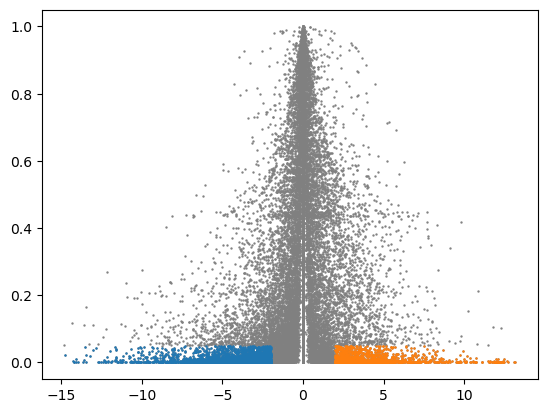

In [17]:
plt.scatter(df['logFC'], df['adj.P.Val'], c="gray", s=0.5)
plt.scatter(listaFC_inferior, listapval_inferior, s=0.5)
plt.scatter(listaFC_superior, listapval_superior, s=0.5)

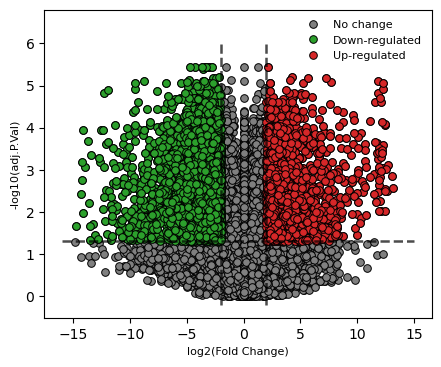

In [69]:
plots_em_x=1
plots_em_y=1
label_size=8
ticksize=10
fig, axs= plt.subplots(plots_em_y,plots_em_x, figsize=(5*plots_em_x, 4*plots_em_y))

#pontos
plt.plot(df['logFC'],-np.log10(df['adj.P.Val']),lw=0,label='No change', marker='o',ms=5.5,mew=0.7, fillstyle='full',markerfacecolor='gray', mec="black")
plt.plot(listaFC_inferior, -np.log10(listapval_inferior),lw=0,label='Down-regulated',marker='o',ms=5.5,mew=0.7, fillstyle='full',markerfacecolor='C2', mec="black")
plt.plot(listaFC_superior, -np.log10(listapval_superior), lw=0,label='Up-regulated',marker='o',ms=5.5,mew=0.7, fillstyle='full',markerfacecolor='C3', mec="black")

#linhas
plt.plot((-16,15),(1.3,1.3), ls="--", color='black',lw=1.8,alpha=0.7)
plt.plot((limite_inferior,limite_inferior),(-0.2,6), ls="--", color='black',lw=1.8,alpha=0.7)
plt.plot((limite_superior,limite_superior),(-0.2,6), ls="--", color='black',lw=1.8,alpha=0.7)

#título dos eixos
axs.set_ylabel(r'-log10(adj.P.Val)',fontsize=label_size)
axs.set_xlabel(r'log2(Fold Change)',fontsize=label_size)

axs.legend(fontsize=label_size, frameon=False)#,bbox_to_anchor=(0.5, 0.4))#loc= 'lower right' )#, )
plt.ylim(None,6.8)
plt.savefig(r'C:\Users\daisy\Desktop\Python\volcanoplot.pdf',bbox_inches='tight',pad_inches=0.02, transparent=True, dpi=700)